In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

dataset = pd.read_csv('alzheimers_prediction_dataset.csv')
dataset = dataset.drop(columns = ['Country']) 
dataset['Gender'] = dataset['Gender'].map({'Male': 0, 'Female': 1})
dataset['Physical Activity Level'] = dataset['Physical Activity Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
dataset['Smoking Status'] = dataset['Smoking Status'].map({'Never': 0, 'Former': 1, 'Current': 2})
dataset['Alcohol Consumption'] = dataset['Alcohol Consumption'].map({'Never': 0, 'Occasionally': 1, 'Regularly': 2})
dataset['Diabetes'] = dataset['Diabetes'].map({'No': 0, 'Yes': 1})
dataset['Hypertension'] = dataset['Hypertension'].map({'No': 0, 'Yes': 1})
dataset['Cholesterol Level'] = dataset['Cholesterol Level'].map({'Normal': 0, 'High': 1})
dataset['Family History of Alzheimer’s'] = dataset['Family History of Alzheimer’s'].map({'No': 0, 'Yes': 1})
dataset['Depression Level'] = dataset['Depression Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
dataset['Sleep Quality'] = dataset['Sleep Quality'].map({'Poor': 0, 'Average': 1, 'Good': 2})
dataset['Dietary Habits'] = dataset['Dietary Habits'].map({'Unhealthy': 0, 'Average': 1, 'Healthy': 2})
dataset['Air Pollution Exposure'] = dataset['Air Pollution Exposure'].map({'Low': 0, 'Medium': 1, 'High': 2})
dataset['Employment Status'] = dataset['Employment Status'].map({'Retired': 0, 'Unemployed': 1, 'Employed': 2})
dataset['Marital Status'] = dataset['Marital Status'].map({'Widowed': 0, 'Married': 1, 'Single': 2})
dataset['Genetic Risk Factor (APOE-ε4 allele)'] = dataset['Genetic Risk Factor (APOE-ε4 allele)'].map({'No': 0, 'Yes': 1})
dataset['Social Engagement Level'] = dataset['Social Engagement Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
dataset['Income Level'] = dataset['Income Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
dataset['Stress Levels'] = dataset['Stress Levels'].map({'Low': 0, 'Medium': 1, 'High': 2})
dataset['Urban vs Rural Living'] = dataset['Urban vs Rural Living'].map({'Urban': 0, 'Rural': 1})
dataset['Alzheimer’s Diagnosis'] = dataset['Alzheimer’s Diagnosis'].map({'No': 0, 'Yes': 1})



In [22]:
X = dataset.drop(columns=['Alzheimer’s Diagnosis']) 
y = dataset['Alzheimer’s Diagnosis']  
split_percentage = 0.7
rows = len(dataset)
split_index = int(rows * split_percentage)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]



Epoch 1/60
5200/5200 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.6767 - loss: 0.6215
Epoch 2/60
5200/5200 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.7023 - loss: 0.5651
Epoch 3/60
5200/5200 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.7043 - loss: 0.5616
Epoch 4/60
5200/5200 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.7066 - loss: 0.5592
Epoch 5/60
5200/5200 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.7070 - loss: 0.5585
Epoch 6/60
5200/5200 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.7084 - loss: 0.5551
Epoch 7/60
5200/5200 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.7065 - loss: 0.5568
Epoch 8/60
5200/5200 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.7096 - loss: 0.5497
Epoch 9/60
5200/5200 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.7103 - loss: 0.5539
Epoch 10/60
5200/5200 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.7113 - loss: 0.5551
Epoch 11/60
5200/5200 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.7036 - loss: 0.5586
Epoch 12/60
5200/5200 ━━━━━━━━

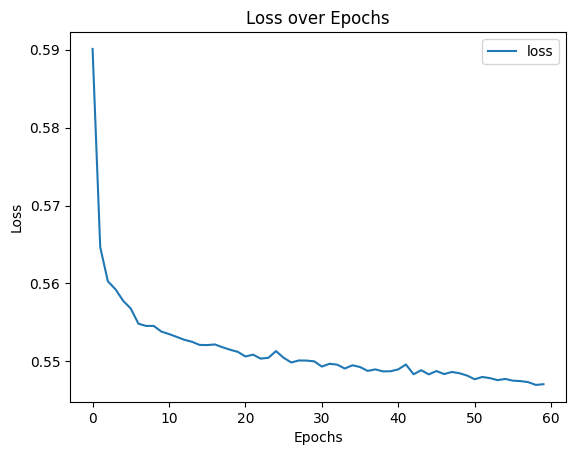

Accuracy: 71.39


In [23]:
model = Sequential()
model.add(Input(shape=(23,)))
model.add(Dense(128, activation= 'selu'))
model.add(Dense(64, activation = 'selu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
training_history = model.fit(X_train, y_train, epochs=60, batch_size=10)  
_, accuracy = model.evaluate(X_train, y_train)  

plt.plot(training_history.history['loss'], label = 'loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()
print('Accuracy: %.2f' % (accuracy*100))

In [24]:
predictions = (model.predict(X_test) > 0.5).astype(int)

print("0 = No, 1 = Yes")
count = 0
for i in range(0,len(X_test)):  
    print('Row %d => %d (expected %d)' % (i, predictions[i], y_test.iloc[i]))  
    



loss, accuracy = model.evaluate(X_test, y_test) 
print("Loss: %.2f" % (loss*100))
print("Accuracy: %.2f" % (accuracy*100))


697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step
0 = No, 1 = Yes
Row 0 => 0 (expected 0)
Row 1 => 1 (expected 0)
Row 2 => 1 (expected 0)
Row 3 => 0 (expected 0)
Row 4 => 1 (expected 0)
Row 5 => 1 (expected 1)
Row 6 => 1 (expected 1)
Row 7 => 0 (expected 0)
Row 8 => 1 (expected 1)
Row 9 => 1 (expected 0)
Row 10 => 1 (expected 0)
Row 11 => 0 (expected 0)
Row 12 => 1 (expected 0)
Row 13 => 1 (expected 1)
Row 14 => 0 (expected 0)
Row 15 => 0 (expected 1)
Row 16 => 1 (expected 1)
Row 17 => 1 (expected 1)
Row 18 => 1 (expected 1)
Row 19 => 0 (expected 0)
Row 20 => 0 (expected 0)
Row 21 => 0 (expected 0)
Row 22 => 1 (expected 1)
Row 23 => 0 (expected 0)
Row 24 => 1 (expected 0)
Row 25 => 0 (expected 1)
Row 26 => 0 (expected 0)
Row 27 => 0 (expected 0)
Row 28 => 1 (expected 1)
Row 29 => 0 (expected 0)
Row 30 => 0 (expected 1)
Row 31 => 1 (expected 1)
Row 32 => 1 (expected 1)
Row 33 => 0 (expected 1)
Row 34 => 0 (expected 0)
Row 35 => 0 (expected 1)
Row 36 => 0 (expected 0)
Row 37 => 0 (expected 0)
R

C:\Temp\ipykernel_2328\269747778.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Row %d => %d (expected %d)' % (i, predictions[i], y_test.iloc[i]))


697/697 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7093 - loss: 0.5494
Loss: 54.75
Accuracy: 71.22
